<a href="https://colab.research.google.com/github/Shantesh123/Command_Line_Testing/blob/main/Copy_of_!pip_install_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install prophet

In [6]:
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True,
    infer_datetime_format=True
).dropna()
df_mercado_trends.index.names = ['Date']
# Review the first and last five rows of the DataFrame
pr_df_mercado_trends=df_mercado_trends
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [97]:
df_mercado_trends

,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38
...,...
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96


<Axes: xlabel='Date'>

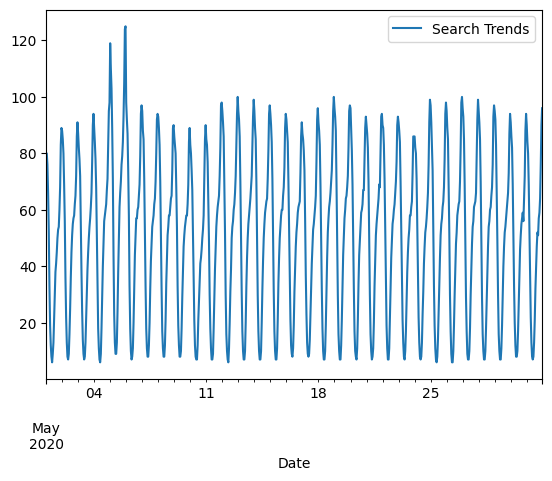

In [98]:
df_mercado_trends_may = df_mercado_trends.loc["2020-05-01":"2020-05-31"]

# Review the df_spotlight DataFrame
df_mercado_trends_may.plot()

In [99]:
traffic_may_2020=df_mercado_trends_may.sum()
traffic_may_2020

Search Trends    38181
dtype: int64

In [100]:
monthly_median_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month]).sum().median()
print(monthly_median_traffic)

Search Trends    35172.5
dtype: float64


In [101]:
comparison_ratio =traffic_may_2020 / monthly_median_traffic
print(comparison_ratio)

Search Trends    1.085536
dtype: float64


<Axes: xlabel='HourOfDay'>

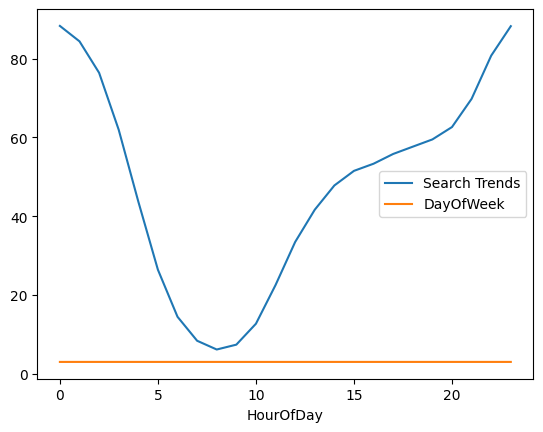

In [104]:
df_mercado_trends['HourOfDay'] = df_mercado_trends.index.hour

#group by day of week
average_traffic_by_hour = df_mercado_trends.groupby('HourOfDay').mean()
average_traffic_by_hour.plot()

<Axes: xlabel='DayOfWeek'>

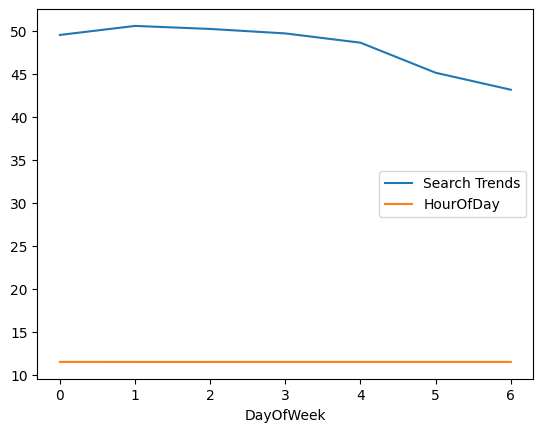

In [105]:
df_mercado_trends['DayOfWeek'] = df_mercado_trends.index.dayofweek

#group by day of week
average_traffic_by_day = df_mercado_trends.groupby('DayOfWeek').mean()
average_traffic_by_day.plot()

<ipython-input-106-477891c9e59e>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_mercado_trends['WeekOfYear'] = df_mercado_trends.index.week


<Axes: xlabel='WeekOfYear'>

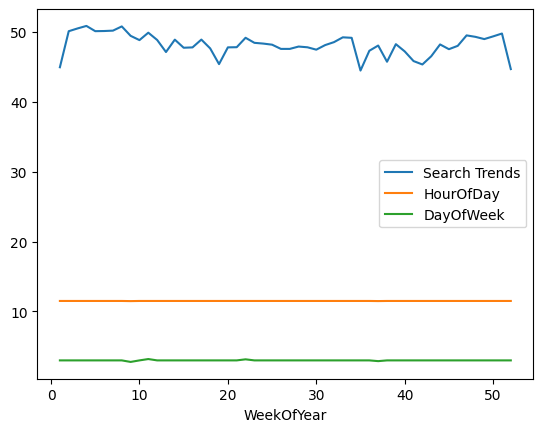

In [106]:
# Group the hourly search data to plot the average traffic by the week of the year
df_mercado_trends['WeekOfYear'] = df_mercado_trends.index.week
average_traffic_by_week = df_mercado_trends.groupby('WeekOfYear').mean()
average_traffic_by_week.plot()
#average_traffic_by_week.plot()

**Question:** Are there any time based trends that you can see in the data?

**Answer: Yes, we can observe that during late afternoon to evenings the search increases signifucantly and also during the early start of the week the search is high and tapers down as the week progresses
the search for the entire year is mostly avegraged out but you can see drops during certain times

In [107]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True
).dropna()
df_mercado_stock.index.names = ['Date']
# df_mercado_stock.set_index('Date',drop=False)

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())


,close
Date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
Date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


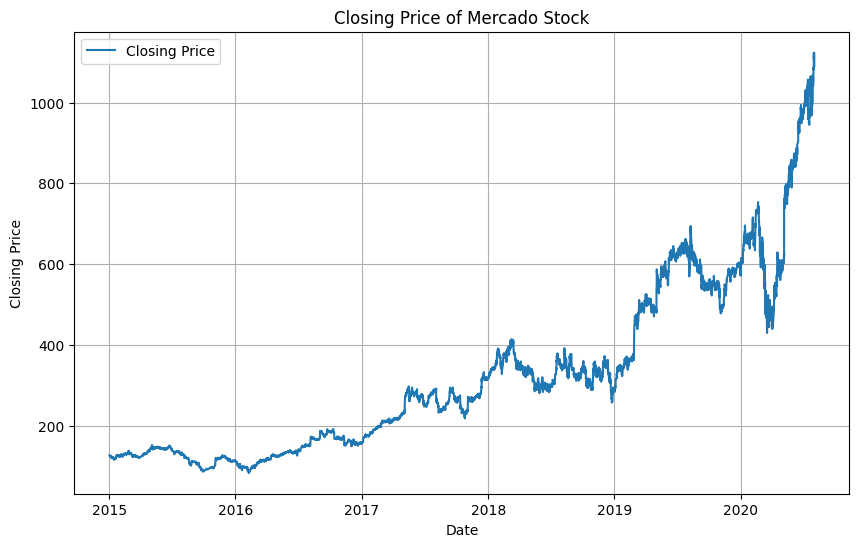

In [108]:

# Set the date as the index and drop rows with missing values

# Extract the closing price column
closing_prices = df_mercado_stock["close"]

# Create a line plot of the closing prices
plt.figure(figsize=(10, 6))
plt.plot(closing_prices, label="Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing Price of Mercado Stock")
plt.legend()
plt.grid(True)
plt.show()

In [109]:

df_combined = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()
df_combined['Date'] = df_combined.index

df_combined.columns.values

df_combined['Date'] = pd.to_datetime(df_combined['Date'])

# Slice the dataframe to the first half of 2020
first_half_2020 = df_combined[(df_combined['Date'].dt.year == 2020) & (df_combined['Date'].dt.month <= 6)]

# View the first and last five rows of the first_half_2020 DataFrame
print(first_half_2020.head())
print(first_half_2020.tail())

                       close  Search Trends  HourOfDay  DayOfWeek  WeekOfYear  \
Date                                                                            
2020-01-02 09:00:00  601.085            9.0        9.0        3.0         1.0   
2020-01-02 10:00:00  601.290           14.0       10.0        3.0         1.0   
2020-01-02 11:00:00  615.410           25.0       11.0        3.0         1.0   
2020-01-02 12:00:00  611.400           37.0       12.0        3.0         1.0   
2020-01-02 13:00:00  611.830           50.0       13.0        3.0         1.0   

                                   Date  
Date                                     
2020-01-02 09:00:00 2020-01-02 09:00:00  
2020-01-02 10:00:00 2020-01-02 10:00:00  
2020-01-02 11:00:00 2020-01-02 11:00:00  
2020-01-02 12:00:00 2020-01-02 12:00:00  
2020-01-02 13:00:00 2020-01-02 13:00:00  
                      close  Search Trends  HourOfDay  DayOfWeek  WeekOfYear  \
Date                                                      

<Axes: xlabel='Date'>

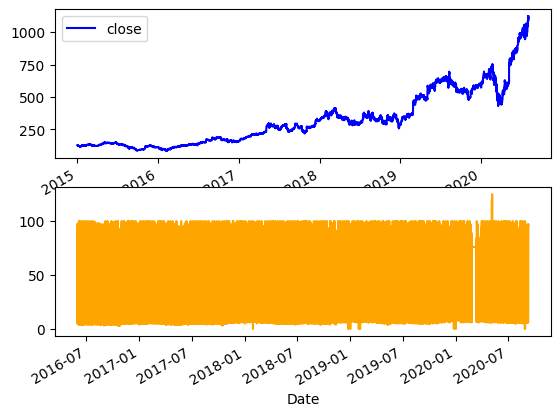

In [110]:
fig, (ax1, ax2) = plt.subplots(2, 1)
# plt.plot(df_combined["close"], label="Close Price",axes=ax1)

# plt.plot(df_combined["Search\ Trends"], label="Search Trends",axes=ax2)

# plt.title("Mercado Stock Price and Search Trends")
# plt.xlabel("Date")
# plt.ylabel("Close Price")
# plt.legend()

# plt.grid(True)
# plt.show()
df_mercado_stock.plot(ax=ax1, c="blue")
df_mercado_trends["Search Trends"].plot(ax=ax2, c="orange")




In [111]:
# Shift the Search Trends column by one hour
df_combined['Lagged Search Trends'] = df_combined['Search Trends'].shift(1)

# Display the updated DataFrame
print(df_combined)

                        close  Search Trends  HourOfDay  DayOfWeek  \
Date                                                                 
2016-06-01 09:00:00   135.160            6.0        9.0        2.0   
2016-06-01 10:00:00   136.630           12.0       10.0        2.0   
2016-06-01 11:00:00   136.560           22.0       11.0        2.0   
2016-06-01 12:00:00   136.420           33.0       12.0        2.0   
2016-06-01 13:00:00   136.100           40.0       13.0        2.0   
...                       ...            ...        ...        ...   
2020-07-31 11:00:00  1105.780           20.0       11.0        4.0   
2020-07-31 12:00:00  1087.925           32.0       12.0        4.0   
2020-07-31 13:00:00  1095.800           41.0       13.0        4.0   
2020-07-31 14:00:00  1110.650           47.0       14.0        4.0   
2020-07-31 15:00:00  1122.510           53.0       15.0        4.0   

                     WeekOfYear                Date  Lagged Search Trends  
Date         

In [112]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
df_combined['Stock Volatility'] = df_combined['close'].rolling(window=4).std()

# Display the updated DataFrame
print(df_combined)

                        close  Search Trends  HourOfDay  DayOfWeek  \
Date                                                                 
2016-06-01 09:00:00   135.160            6.0        9.0        2.0   
2016-06-01 10:00:00   136.630           12.0       10.0        2.0   
2016-06-01 11:00:00   136.560           22.0       11.0        2.0   
2016-06-01 12:00:00   136.420           33.0       12.0        2.0   
2016-06-01 13:00:00   136.100           40.0       13.0        2.0   
...                       ...            ...        ...        ...   
2020-07-31 11:00:00  1105.780           20.0       11.0        4.0   
2020-07-31 12:00:00  1087.925           32.0       12.0        4.0   
2020-07-31 13:00:00  1095.800           41.0       13.0        4.0   
2020-07-31 14:00:00  1110.650           47.0       14.0        4.0   
2020-07-31 15:00:00  1122.510           53.0       15.0        4.0   

                     WeekOfYear                Date  Lagged Search Trends  \
Date        

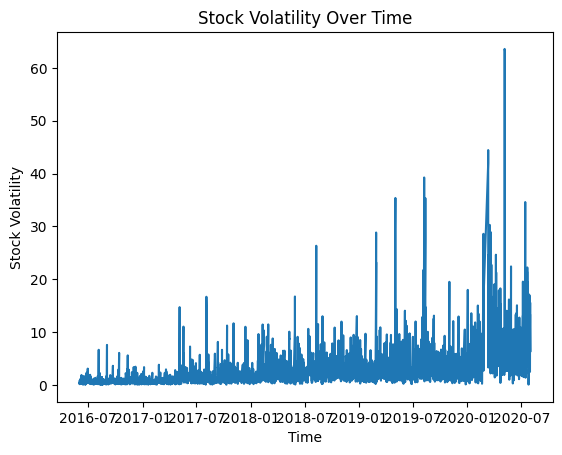

In [114]:
plt.plot(df_combined['Stock Volatility'])
plt.xlabel('Time')
plt.ylabel('Stock Volatility')
plt.title('Stock Volatility Over Time')
plt.show()

In [117]:
df_combined['Hourly Stock Return'] = df_combined['close'].pct_change()
df_combined.reset_index(drop=True, inplace=True)
# Display the updated DataFrame
df_combined.index=df_combined['Date']
df_combined = df_combined.drop('Date', axis=1)
display(df_combined.head())
display(df_combined.tail())

,close,Search Trends,HourOfDay,DayOfWeek,WeekOfYear,Lagged Search Trends,Stock Volatility,Hourly Stock Return
Date,,,,,,,,
2016-06-01 09:00:00,135.16,6.0,9.0,2.0,22.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,10.0,2.0,22.0,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,11.0,2.0,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,12.0,2.0,22.0,22.0,0.693848,-0.001025
2016-06-01 13:00:00,136.10,40.0,13.0,2.0,22.0,33.0,0.235142,-0.002346


,close,Search Trends,HourOfDay,DayOfWeek,WeekOfYear,Lagged Search Trends,Stock Volatility,Hourly Stock Return
Date,,,,,,,,
2020-07-31 11:00:00,1105.780,20.0,11.0,4.0,31.0,11.0,7.495900,0.006380
2020-07-31 12:00:00,1087.925,32.0,12.0,4.0,31.0,20.0,12.188462,-0.016147
2020-07-31 13:00:00,1095.800,41.0,13.0,4.0,31.0,32.0,7.393646,0.007239
2020-07-31 14:00:00,1110.650,47.0,14.0,4.0,31.0,41.0,10.169735,0.013552
2020-07-31 15:00:00,1122.510,53.0,15.0,4.0,31.0,47.0,15.408790,0.010678


In [124]:
correlation_table = df_combined[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()
correlation_table

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.118945,0.046723
Lagged Search Trends,-0.118945,1.000000,0.017929
Hourly Stock Return,0.046723,0.017929,1.000000


In [130]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
pr_df_mercado_trends.reset_index(inplace=True)

# Label the columns ds and y so that the syntax is recognized by Prophet
pr_df_mercado_trends.columns = ['ds', 'y']

# Drop an NaN values from the prophet_df DataFrame
pr_df_mercado_trends.dropna(inplace=True)

# View the first and last five rows of the mercado_prophet_df DataFrame
display(pr_df_mercado_trends.head())
display(pr_df_mercado_trends.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [131]:
# Call the Prophet function, store as an object
prophet_model = Prophet()

In [132]:
prophet_model.fit(df_mercado_trends)

DEBUG:cmdstanpy:input tempfile: /tmp/tmphmf7bgwq/w0cetaoe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphmf7bgwq/5a411g3s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41671', 'data', 'file=/tmp/tmphmf7bgwq/w0cetaoe.json', 'init=/tmp/tmphmf7bgwq/5a411g3s.json', 'output', 'file=/tmp/tmphmf7bgwq/prophet_modelrdb885lm/prophet_model-20240208231437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:14:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:14:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [133]:
future_mercado_trends = prophet_model.make_future_dataframe(periods=2000, freq='H')
display(future_mercado_trends.tail())

,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [134]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame

forecast_mercado_trends = prophet_model.predict(future_mercado_trends)
# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast_mercado_trends.head())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.469500,81.019690,98.099425,44.469500,44.469500,45.159722,45.159722,45.159722,41.452703,...,1.860594,1.860594,1.860594,1.846426,1.846426,1.846426,0.0,0.0,0.0,89.629222
1,2016-06-01 01:00:00,44.470406,78.125826,94.009794,44.470406,44.470406,41.605529,41.605529,41.605529,37.943556,...,1.810498,1.810498,1.810498,1.851474,1.851474,1.851474,0.0,0.0,0.0,86.075935
2,2016-06-01 02:00:00,44.471312,67.266363,84.668088,44.471312,44.471312,31.282049,31.282049,31.282049,27.656646,...,1.768912,1.768912,1.768912,1.856491,1.856491,1.856491,0.0,0.0,0.0,75.753361
3,2016-06-01 03:00:00,44.472218,52.102413,68.576031,44.472218,44.472218,16.014826,16.014826,16.014826,12.417424,...,1.735926,1.735926,1.735926,1.861476,1.861476,1.861476,0.0,0.0,0.0,60.487045
4,2016-06-01 04:00:00,44.473124,34.734944,51.547728,44.473124,44.473124,-1.100073,-1.100073,-1.100073,-4.677999,...,1.711496,1.711496,1.711496,1.866430,1.866430,1.866430,0.0,0.0,0.0,43.373051


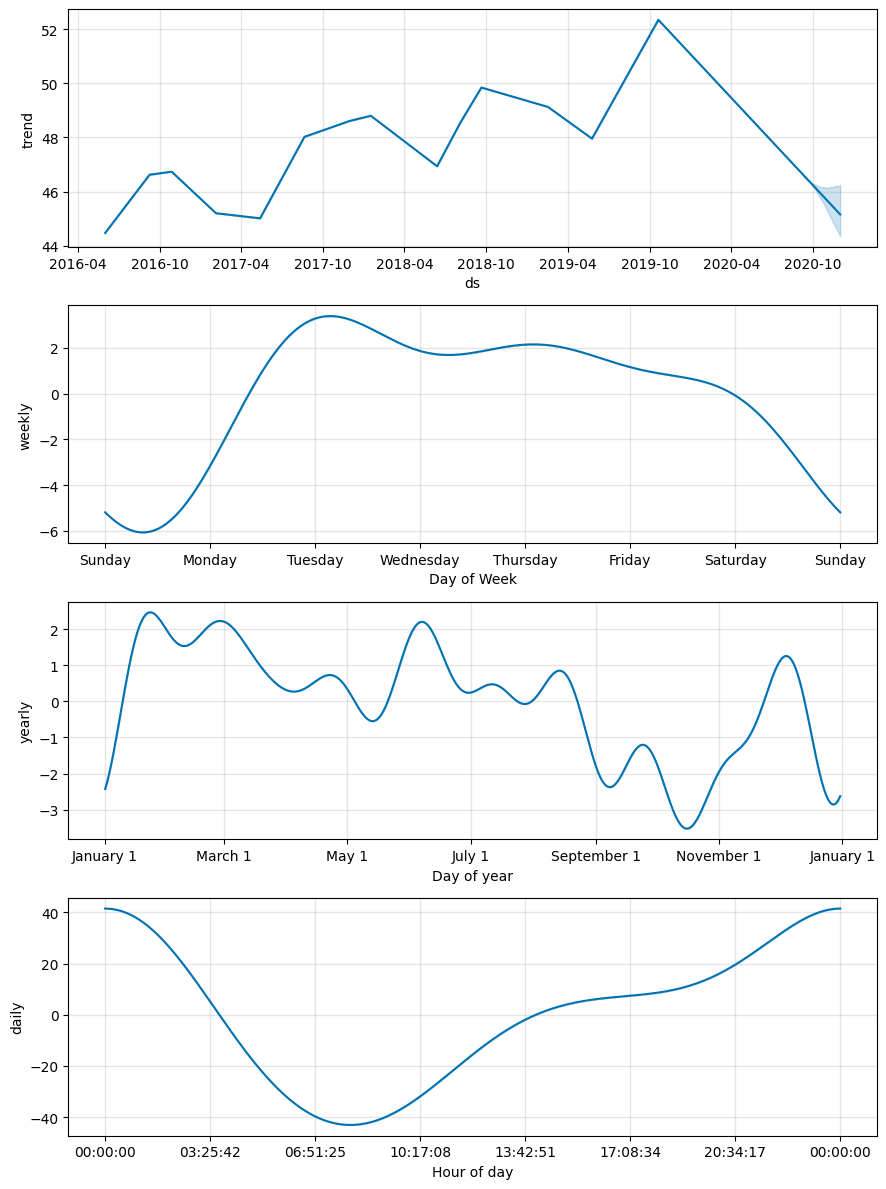

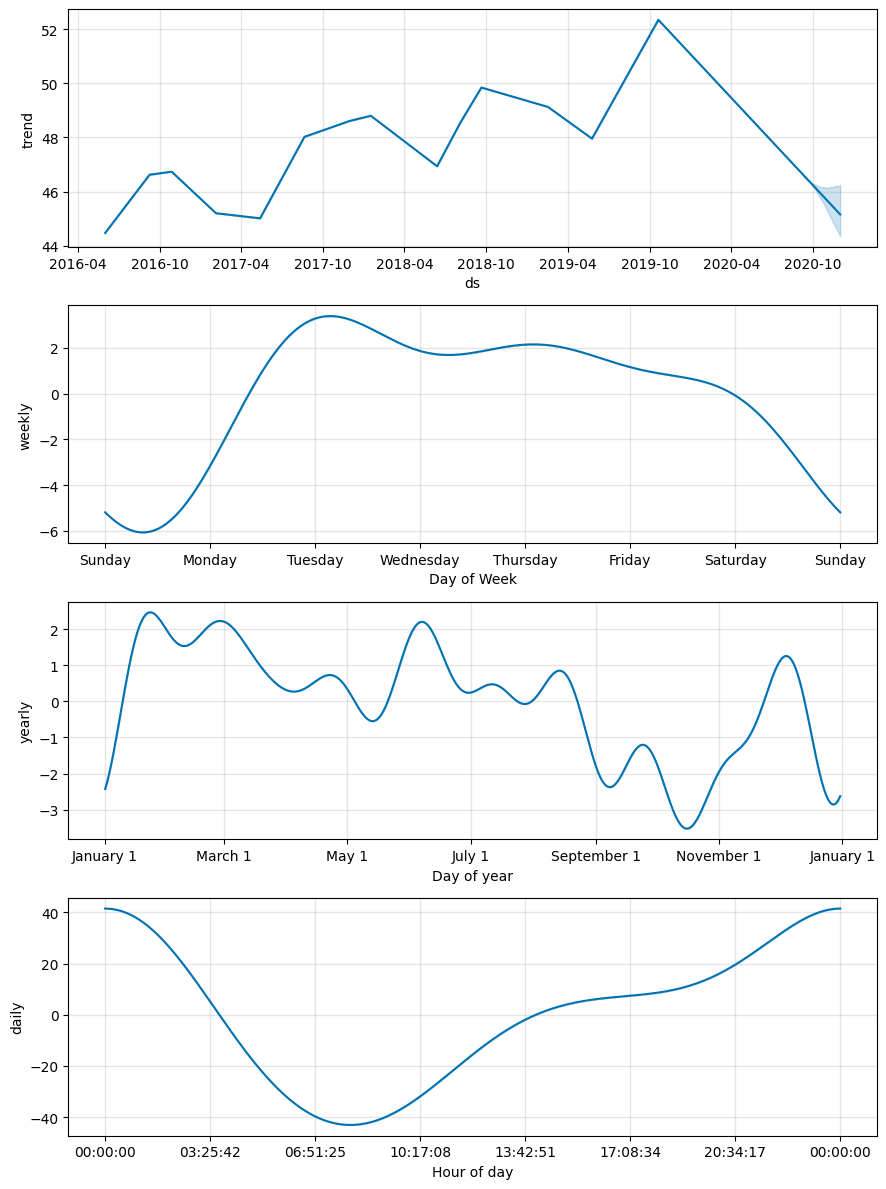

In [135]:
# Plot the Prophet predictions for the Mercado trends data
prophet_model.plot_components(forecast_mercado_trends)